University of Stirling<br>
Computing Science and Mathematics<br>
#### CSCU9YE - Artificial Intelligence<p>   
## Assignment: Organising a Colour Palette 
This notetbook offers some auxiliary code to support your programming assignment.    

This algorithm is created to mimic nature in its evolution.<br>
We start with a random population, and at the end of every iteration, we evaluate the fitness of a generation to find its optimal solution for a given problem (here, better ordering with a lower Euclidean distance).<br>
With those selected solutions, we create a portion of offspring to build a new generation.<br>
We then evaluate the generation and repeat until completion of the loop.

### Reading the data file 

In [1]:
import numpy as np      # Numerical library, used keeing the list of colours and computing the Euclidean distance

# Read in the color data file 
# Input: string with file name
# Oputput: the number of colours (integer), and a list numpy arrays with all the colours
def read_data(fname): 
    cols = np.loadtxt(fname, skiprows = 4) # The first 4 lines have text information, and are ignored     
    ncols = len(cols)     # Total number of colours and list of colours
    return ncols,cols

### Plotting a sequence of colours

The function <b>plot_colors()</b> displaysthe colours from the color list *col_list* the order given by the *col_order* list. 

*col_list* and *col_order* need to be of the same length. The *ratio* parameter indicates height/width proportion of each bar of colour in the plot.

In [2]:
import matplotlib.pyplot as plt

# Dsiplay the colors as a strip of color bars
# Input: list of colors, order of colors, and height/ratio

def plot_colors(col_list, col_order, ratio = 10): 
    assert len(col_list) == len(col_order)
    img = np.zeros((ratio, len(col_list), 3))
    for i in range(0, len(col_list)):
        img[:, i, :] = col_list[col_order[i]]
    fig, axes = plt.subplots(1, figsize=(10,6)) # figsize=(width,height) handles window dimensions
    axes.imshow(img, interpolation='nearest')
    axes.axis('off')
    plt.show()

### Examples of ploting a colour ordering

Let us see how to call the plot function, using the original order in which the colours appear in the data file, and another randomised order.

In [3]:
import random as rnd

# Function to generate a random solution (random ordering)  - we can generate a random ordering of the list by using
# the shuffle function from the random library
def random_sol():
    sol = list(range(ncolors))   # list of consequtive numbers from 0 to ncolors
    # Shuffle the elements in the list randomly. Shuffles in place and doesn’t retunr a value
    rnd.shuffle(sol)   
    return sol

### Evaluation function to determine the quality of a given ordering of colours

When solving the problem using optimisation heuristics, we need an evaluation function to measure the quality of a sulution. The problem is formulated as a minimisation  problem. We want to minimise the pair-wise distance between consequtive colours in the ordering. 

This function computes the quality of given ordering of colours. The smaller the evaluation function the better, as this is is formulated as a minimisation problem

In [4]:
# This is an auxiliary function. It calculate the Euclidean distance between two individual colours
# Input: v and u as to be numpy arrays, vectors of real numbers with the RGB coordinates.

def euclid(v, u):
    return np.linalg.norm(v - u)

# Evaluation function.  Measures the quality of a given solution (ordering of colours) 
# The function computes the sum of the distances between all consecutive colours in the ordering
# Input: cols: list of colours 
#        ordc: ordering of colours
# Output: real number with the sumf of pair-wise differences in the colour ordering
def evaluate(cols, ordc):     
    adjacentColPairs = [[cols[ordc[i]],cols[ordc[i-1]]] for i in range(1,len(ordc))]
    return sum([euclid(i[1], i[0]) for i in adjacentColPairs])

In [5]:
# This function creates a neighbour to the passed in solution using the shuffle mutation.
# The function will generate two random numbers and swap the values at the two random indexes.
# Input:  s: the solution we want to create a random neighbour of.
# Ouput:  return the random neighbour solution 
def random_neigh_swap(s):
    r1 = rnd.randint(0, (len(s)-1))
    r2 = rnd.randint(0, (len(s)-1))
    while (r1 == r2):
        r2 = rnd.randint(0, (len(s)-1))
        
    neigh_sol = s[:]
    
    neigh_sol[r1] = s[r2]
    neigh_sol[r2] = s[r1] 
    
    return neigh_sol

In [6]:
# This function creates a generation of solutions with the passed parameter as size.
# For each solution, the function will create a random solution and evaluate the Euclidean distance of that solution.
# Both values (solution and distance) are stored through a 2D array.
# Input:  the number of solutions per generation.
# Output: returns the generated generation.
def generate_initial_generation(population_count):
    populations = []
    for i in range(population_count):
        random_s = random_sol()
        populations.append([random_s, evaluate(colors, random_s)])
    return populations

In [7]:
# This function goes through every value in a population 
# and evaluates it's Euclidean distance, while re-assigning the new value in the array.
# Input:  the generation that we want to evaluate and sort.
def evaluate_generation(populations):
    for i in range(len(populations)):
        populations[i][1] = evaluate(colors, populations[i][0])
    populations.sort(key=lambda x:x[1])  # sort the 2D array based on the Euclidean distance of each solution.
        
    return populations

In [8]:
import math

# This function chooses the portion of the population that will be kept as parents to the next generation.
# Input:  the populations of the current generation for which we want to select the parents.
# Output: returns an array of half the best solutions.
def selection(populations):
    parents = populations[:math.ceil(len(populations) / 2)] # select half of the passed population.
    
    return parents[:]

In [9]:
# This function creates the offspring of a population using their parents.
# For every parent kept, we create a random neighbour offspring using the swap mutation.
# Input:  the best parents of the current generation.
# Oupput: returns the offspring generated from the parent solutions.
def mutate(parents):
    offspring = []
    
    for j in range(len(parents)):
        offspring.append(parents[j][:]) # Copy parents into empty array.
    
    for i in range(len(offspring)):
        offspring[i][0] = random_neigh_swap(offspring[i][0])  # Generate offspring solution.
    
    return offspring

In [10]:
# This function merges the parents solutions with the offspring solutions to create a new generation.
# Input:  parents: the best solutions from the current generation.
#         offspring: the solutions generated using the parents.
# Output: returns the parents and offspring that make up a new generation.
def breed_population(parents, offspring):
    new_pop = []
    
    for i in range(len(parents)):
        new_pop.append(parents[i])
        new_pop.append(offspring[i])
    
    return new_pop

In [11]:
# This function is the core function of the Evolutionary Algorithm.
# Input:  population_count: the number of solutions per generation
#         iterations: number of iterations
#         trace: a record of every best solution per iterations
# Output: the best solutions after trying the evolutionary algorithm a set amount of times.
def ea(population_count, iterations, trace):
    
    populations = generate_initial_generation(population_count)

    populations.sort(key=lambda x:x[1])

    while (iterations > 0):
        # Select parents
        parents = selection(populations)
        # Create offspring
        offspring = mutate(parents[:])
        
        # Merge parents and offspring
        populations = breed_population(parents, offspring)
        # Evalute the new generation
        populations = evaluate_generation(populations)  
        
        # Append best solution to the trace
        trace.append(populations[0][1])
        
        iterations -= 1
    return populations[0]

In [12]:
import matplotlib.pyplot as plt

# This function plots the trace of each best solution for each iterations.
# Input:  trace: the best solutions for each iterations run
#         filename: the current file that is being optimized (100 or 500)
def plot_trace(trace, filename):
    #print(trace) # First print the trace
    plt.figure()
    plt.plot(trace,color='red', linewidth=2)
    plt.title('Trace hill-climbing ' + filename)
    plt.ylabel('Euclidean Distance')
    plt.show()

Running the algorithm the 100 colors for a population of 100 solutions by 10000 iterations.

<h3>Running the 100 colors</h3>

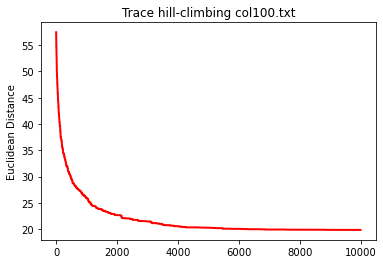

Best solution: [12, 33, 14, 25, 56, 5, 70, 10, 58, 79, 81, 93, 19, 66, 49, 74, 84, 30, 45, 7, 20, 36, 53, 13, 75, 71, 41, 34, 42, 69, 86, 26, 47, 91, 54, 31, 0, 24, 72, 18, 46, 51, 44, 35, 95, 11, 62, 1, 16, 77, 38, 52, 67, 21, 4, 9, 59, 8, 2, 15, 82, 48, 22, 23, 55, 39, 27, 94, 78, 50, 37, 60, 80, 63, 64, 73, 6, 43, 28, 85, 68, 29, 76, 40, 92, 32, 17, 83, 3, 89, 57, 61, 88, 65, 87, 90]
Distance: 19.857690169658404
Time taken: 987.5055942


In [13]:
import timeit

filename = "col100.txt"
ncolors, colors = read_data(filename)
trace = []

start_time = timeit.default_timer()
best = ea(100, 10000, trace) # population size, iterations, and a trace to plot after the algorithm is complete
stop_time = timeit.default_timer()
plot_trace(trace, filename)
print("Best solution:", best[0])
print("Distance:", best[1])
print("Time taken:", stop_time - start_time)

<h3>Running the 500 colors</h3>

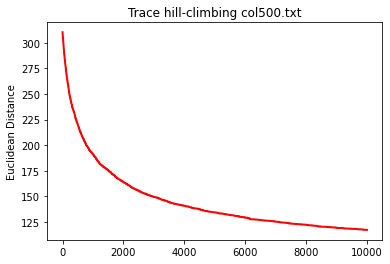

Best solution: [228, 238, 67, 434, 298, 95, 443, 456, 25, 155, 68, 132, 21, 373, 214, 402, 387, 111, 23, 260, 166, 295, 13, 177, 69, 418, 425, 55, 39, 350, 26, 342, 9, 305, 84, 381, 463, 22, 104, 446, 399, 252, 302, 404, 359, 143, 65, 296, 145, 189, 122, 254, 290, 16, 328, 473, 317, 267, 256, 134, 247, 394, 120, 107, 448, 227, 50, 369, 263, 313, 4, 85, 339, 261, 97, 337, 360, 123, 183, 242, 11, 299, 397, 54, 98, 243, 423, 0, 44, 410, 239, 255, 368, 10, 158, 17, 268, 102, 20, 7, 216, 194, 352, 101, 164, 333, 479, 336, 264, 460, 5, 453, 343, 137, 35, 81, 66, 100, 401, 192, 326, 191, 450, 157, 490, 197, 147, 92, 476, 129, 38, 265, 229, 279, 316, 419, 485, 188, 378, 379, 259, 124, 432, 125, 281, 364, 45, 354, 391, 240, 426, 271, 79, 244, 210, 393, 215, 121, 106, 330, 495, 233, 438, 384, 19, 269, 488, 398, 128, 472, 48, 117, 406, 489, 457, 297, 474, 47, 424, 289, 282, 185, 319, 274, 341, 231, 167, 334, 8, 82, 469, 211, 447, 196, 2, 286, 103, 411, 275, 300, 363, 412, 99, 205, 435, 388, 24, 1

In [14]:
filename = "col500.txt"
ncolors, colors = read_data(filename)
trace = []

start_time = timeit.default_timer()
best = ea(100, 10000, trace) # population size, iterations, and a trace to plot after the algorithm is complete
stop_time = timeit.default_timer()
plot_trace(trace, filename)
print("Best solution:", best[0])
print("Distance:", best[1])
print("Time taken:", stop_time - start_time)

The process was run for a population of 100 solutions over a repetition of 10000 iterations.<br>
I decided to implement the random neighbour as a swap, as I concluded from exercise 1 that it was the most effective mutation.

<h3>Final Results</h3>
I have decided to implement a simple genetic algorithm to find the best order of colors.<br>
The crossover rate is set to be 50 percent, which makes the progress of the evolution quite slow, but quite efficient for this problem.<br>
To create the offspring, we apply the random neighbour swap mutation to the best half of that generation, hopefully improving each solution.<br>
This of course makes the improvement quite slow, but steady (as seen with the multi-hill exercise).<br><br>

This algorithm is performing as better than the mutli-hill algorithm, but like the multi-hill climbing, to find the best solution, it would have to run for a very long time.<br>
I made the code run for 10000 iterations of a population of a 100, which too about 15 minutes for the 100 colors and 75 minutes for the 500 colors.<br>

In [18]:
# 100 colors
best_EA_100 = [12, 33, 14, 25, 56, 5, 70, 10, 58, 79, 81, 93, 19, 66, 49, 74, 84, 30, 45, 7, 20, 36, 53, 13, 75, 71, 41, 34, 42, 69, 86, 26, 47, 91, 54, 31, 0, 24, 72, 18, 46, 51, 44, 35, 95, 11, 62, 1, 16, 77, 38, 52, 67, 21, 4, 9, 59, 8, 2, 15, 82, 48, 22, 23, 55, 39, 27, 94, 78, 50, 37, 60, 80, 63, 64, 73, 6, 43, 28, 85, 68, 29, 76, 40, 92, 32, 17, 83, 3, 89, 57, 61, 88, 65, 87, 90]
best_EA_score_100 = 19.8576

# 500 colors
best_EA_500 = [228, 238, 67, 434, 298, 95, 443, 456, 25, 155, 68, 132, 21, 373, 214, 402, 387, 111, 23, 260, 166, 295, 13, 177, 69, 418, 425, 55, 39, 350, 26, 342, 9, 305, 84, 381, 463, 22, 104, 446, 399, 252, 302, 404, 359, 143, 65, 296, 145, 189, 122, 254, 290, 16, 328, 473, 317, 267, 256, 134, 247, 394, 120, 107, 448, 227, 50, 369, 263, 313, 4, 85, 339, 261, 97, 337, 360, 123, 183, 242, 11, 299, 397, 54, 98, 243, 423, 0, 44, 410, 239, 255, 368, 10, 158, 17, 268, 102, 20, 7, 216, 194, 352, 101, 164, 333, 479, 336, 264, 460, 5, 453, 343, 137, 35, 81, 66, 100, 401, 192, 326, 191, 450, 157, 490, 197, 147, 92, 476, 129, 38, 265, 229, 279, 316, 419, 485, 188, 378, 379, 259, 124, 432, 125, 281, 364, 45, 354, 391, 240, 426, 271, 79, 244, 210, 393, 215, 121, 106, 330, 495, 233, 438, 384, 19, 269, 488, 398, 128, 472, 48, 117, 406, 489, 457, 297, 474, 47, 424, 289, 282, 185, 319, 274, 341, 231, 167, 334, 8, 82, 469, 211, 447, 196, 2, 286, 103, 411, 275, 300, 363, 412, 99, 205, 435, 388, 24, 18, 108, 461, 309, 212, 163, 226, 385, 151, 478, 251, 355, 285, 372, 180, 74, 49, 199, 144, 308, 153, 346, 374, 83, 347, 224, 332, 172, 331, 230, 327, 176, 366, 162, 27, 181, 250, 482, 294, 72, 46, 471, 148, 270, 365, 477, 126, 179, 266, 218, 315, 203, 324, 380, 161, 200, 76, 322, 174, 420, 345, 86, 133, 168, 403, 80, 451, 408, 28, 63, 6, 73, 64, 109, 60, 422, 371, 160, 207, 57, 204, 193, 356, 127, 136, 236, 318, 396, 15, 59, 53, 36, 40, 458, 135, 90, 118, 481, 405, 154, 1, 437, 377, 112, 149, 178, 61, 323, 427, 491, 209, 51, 442, 245, 141, 440, 237, 170, 415, 77, 219, 301, 52, 431, 75, 306, 213, 208, 253, 392, 439, 287, 246, 454, 320, 351, 32, 206, 42, 113, 175, 138, 344, 34, 310, 304, 361, 487, 462, 416, 70, 105, 217, 31, 400, 414, 262, 30, 184, 225, 375, 340, 110, 87, 223, 273, 202, 311, 382, 303, 186, 234, 329, 220, 338, 466, 146, 37, 78, 465, 62, 293, 3, 468, 441, 407, 452, 89, 362, 182, 221, 140, 94, 494, 417, 142, 312, 248, 370, 93, 276, 480, 115, 257, 444, 376, 195, 358, 156, 325, 455, 41, 71, 395, 464, 470, 258, 91, 187, 116, 119, 433, 190, 467, 249, 383, 272, 413, 29, 152, 349, 449, 12, 222, 173, 288, 278, 159, 484, 307, 348, 96, 165, 291, 389, 201, 235, 321, 277, 284, 335, 475, 386, 198, 492, 280, 493, 353, 58, 139, 483, 241, 130, 150, 486, 43, 114, 459, 428, 14, 357, 56, 430, 171, 314, 33, 421, 429, 436, 292, 232, 390, 367, 88, 283, 169, 131, 409, 445]
best_EA_score_500 = 117.1538